# <div align="right">Machine Learning
### <div align="right"> *Followblindly*

# 07 - K-Nearest Neighbors

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. KNN algorithm used for both **classification** and **regression** problems.

We say that KNN is a non-parametric and lazy learning algorithm. **Non-parametric** means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. **Lazy algorithm** means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

* Training example in Euclidean space: $x\in\mathbf{R}^{d}$

* **Idea:** The value of the target function for a new query is estimated from the known value(s) of the nearest training example(s)

* Distance typically defined to be Euclidean:

$$
\parallel x^{(a)}-x^{(b)} \parallel_{2} = \sqrt{\sum_{j=1}^{d}(x_{j}^{(a)} - x_{j}^{(b)})^{2}}
$$

### kNN Algorithom

1. Load the training and test data 
2. Choose the value of K 
3. For each point in test data:
       - find the Euclidean distance to all training data points
       - store the Euclidean distances in a list and sort it 
       - choose the first k points 
       - assign a class to the test point based on the majority of classes present in the chosen points
4. End 

<img src="07_images/7_knn_algorithom.PNG" width=800px/>

### Choice of k

* $k=1$ can be unstable, particularly if the data are noisy
* Better to choose an odd number to avoid ties, e.g. $k=3$ or $k=5$
* Larger $k$ may lead to better performance. But if we set $k$ too large we may end up looking at samples that are not neighbors (are far away from the query)
* Rule of thumb is $k < sqrt(n)$, where $n$ is the number of training examples
* Choose $k$ that yields the smallest error on the test data

## Pros and Cons of K-Nearest Neighbors

### Pros:
* It is extremely easy to implement
* It is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
* Since the algorithm requires no training before making predictions, new data can be added seamlessly.
* There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

### Cons:
* Accuracy depends on the quality of the data.
* Poor at classifying data points in a boundary where they can be classified one way or another.
* Doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
* Has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
* Doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

### Issues & Remedies

* If some attributes (coordinates of x) have **larger ranges**, they are treated as more important
    * Normalize scale
         - Simple option: Linearly scale the range of each feature to be, e.g., in range $[0,1]$
         - Linearly scale each dimension to have 0 mean and variance 1 (compute mean $\mu$ and variance $\sigma^{2}$ for an attribute $x_{j}$ and scale: $\frac{(x_{j} - m)}{\sigma}$)
    * Be careful: sometimes scale matters

* **Irrelevant**, **correlated** attributes add noise to distance measure
    * eliminate some attributes
    * or vary and possibly adapt weight of attributes
    
* **Non-metric** attributes (symbols)
    * Hamming distance

* **Expensive at test time:** To find one nearest neighbor of a query point $x$, we must compute the distance to all $N$ training examples. Complexity: $O(kdN)$ for kNN
    * Use subset of dimensions
    * Pre-sort training examples into fast data structures (e.g., kd-trees)
    * Compute only an approximate distance (e.g., LSH)
    * Remove redundant data (e.g., condensing)

* **Storage Requirements:** Must store all training data
    * Remove redundant data (e.g., condensing)
    * Pre-sorting often increases the storage requirements

* **High Dimensional Data:** “Curse of Dimensionality”
    * Required amount of training data increases exponentially with dimension
    * Computational cost also increases

## Implementing KNN Algorithm with Sklearn

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [39]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
iris['SepalLengthCm'] = pd.to_numeric(iris['SepalLengthCm'])
iris['SepalWidthCm'] = pd.to_numeric(iris['SepalWidthCm'])
iris['PetalLengthCm'] = pd.to_numeric(iris['PetalLengthCm'])
iris['PetalWidthCm'] = pd.to_numeric(iris['PetalWidthCm'])

In [41]:
df1 = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']]
X_data = df1.iloc[:,0:4]
y_labels = df1.iloc[:,4].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size = 0.2, random_state = 4)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test,y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

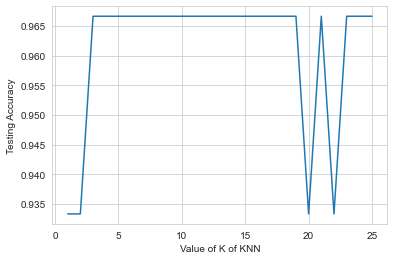

In [47]:
%matplotlib inline
plt.plot(k_range, scores_list)
plt.xlabel('Value of K of KNN')
plt.ylabel('Testing Accuracy')

## Reference

[1]$\ \ \ \$Zemel, R., Urtasun, R., &amp; Fidler, S. (n.d.). CSC 411: Lecture 05: Nearest Neighbors. https://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/05_nn.pdf. 

[2]$\ \ \ \$Sanjay.M. (2018, November 2). KNN using scikit-learn. Medium. https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75. 